In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, boxcox
from scipy.special import inv_boxcox

import pickle

from common.utils import *

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
raw_data = pd.read_csv('../data/Crop_Data__train.csv')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164986 entries, 0 to 164985
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     164986 non-null  object 
 1   District                  164986 non-null  object 
 2   Lat                       164986 non-null  float64
 3   Long                      164986 non-null  float64
 4   GW_depth_Min              164986 non-null  float64
 5   GW_depth_Max              164986 non-null  float64
 6   Wells_depth_0_to_2        164986 non-null  int64  
 7   Wells_depth_2_to_5        164986 non-null  int64  
 8   Wells_depth_5_to_10       164986 non-null  int64  
 9   Wells_depth_10_to_20      164986 non-null  float64
 10  Wells_depth_20_to_40      164986 non-null  float64
 11  Wells_depth_40_and_above  164986 non-null  float64
 12  Precipitation             164986 non-null  float64
 13  Solar_Radiation           164986 non-null  f

In [6]:
raw_data.head()

,State,District,Lat,Long,GW_depth_Min,GW_depth_Max,Wells_depth_0_to_2,Wells_depth_2_to_5,Wells_depth_5_to_10,Wells_depth_10_to_20,Wells_depth_20_to_40,Wells_depth_40_and_above,Precipitation,Solar_Radiation,Surface_Pressure,Humidity,Temp_Max,Temp_Min,Dew_Frost_Point,Wind_Speed,Year,Season,Crop,Area,Production
0,KARNATAKA,BIDAR,14.54387,76.23089,3.65,20.30,0,4,7,6.0,1.0,0.0,66.890833,19.725833,94.141667,62.022,31.448,19.958,16.594,3.268,2014,Whole Year,Coriander,76.0,26.0
1,ASSAM,SIVASAGAR,26.82490,94.17820,1.94,7.19,2,1,1,0.0,0.0,0.0,19.656000,17.538000,97.352000,59.524,24.642,12.838,9.638,0.518,2001,Rabi,Urad,399.0,222.0
2,GUJARAT,VADODARA,22.27342,73.18848,3.05,37.90,0,4,17,10.0,5.0,0.0,236.414000,17.544000,99.666000,79.024,31.816,24.144,23.304,2.984,2003,Kharif,Urad,13100.0,10700.0
3,RAJASTHAN,DUNGARPUR,23.68344,73.82284,2.44,20.60,0,4,6,7.0,1.0,0.0,79.125833,18.270833,97.630833,48.312,33.668,20.010,12.087,2.317,2006,Whole Year,Guar seed,1799.0,45.0
4,ASSAM,TINSUKIA,27.47920,95.37184,0.14,4.90,1,5,2,0.0,0.0,0.0,96.498333,15.804167,96.608333,62.027,30.314,19.018,15.793,0.290,2001,Whole Year,Potato,2605.0,16774.0


In [7]:
raw_data.shape

(164986, 25)

In [8]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,164986,30,UTTAR PRADESH,25759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District,164986,516,TUMKUR,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,164986,NaN,NaN,NaN,22.1978,5.59709,8.08783,18.5383,23.7214,26.3544,33.2203
Long,164986,NaN,NaN,NaN,80.5854,5.4176,69.611,76.5532,79.3863,83.8242,96.6535
GW_depth_Min,164986,NaN,NaN,NaN,2.9253,3.05719,-0.95,1.4,2.42,3.65,43.95
GW_depth_Max,164986,NaN,NaN,NaN,21.4036,17.2144,-0.21,10.82,17.25,25.68,128.15
Wells_depth_0_to_2,164986,NaN,NaN,NaN,1.27863,2.95843,0,0,0,1,51
Wells_depth_2_to_5,164986,NaN,NaN,NaN,6.93998,8.02365,0,2,4,10,48
Wells_depth_5_to_10,164986,NaN,NaN,NaN,12.1134,11.7355,0,3,9,17,67
Wells_depth_10_to_20,164986,NaN,NaN,NaN,6.7391,8.30502,0,1,4,10,77


In [9]:
df_v1 = raw_data.copy()

In [10]:
# df_v1 = remove_other_crops(df_v1)
# df_v1 = remove_zero_production_crops(df_v1)
# df_v1.shape

## Add Yield = Production / Area

In [12]:
df_v1['Yield'] = df_v1['Production'] / df_v1['Area']

## Target = BoxCox(Yield)

In [13]:
boxcox(df_v1['Yield']+1)

(array([0.26065918, 0.36940216, 0.46939726, ..., 0.92422184, 0.58043064,
        0.81699507]),
 -0.8410188383945721)

<AxesSubplot:ylabel='Density'>

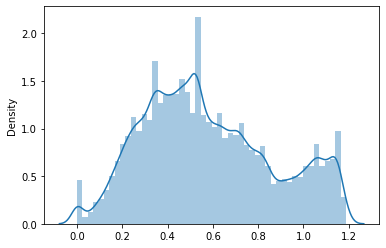

In [14]:
sns.distplot(boxcox(df_v1['Yield']+1)[0])

In [15]:
# Kurtosis
kurtosis(boxcox(df_v1['Yield']+1)[0])

-0.7061232367492418

In [16]:
# Skew
skew(boxcox(df_v1['Yield']+1)[0])

0.36470210786158397

**Observations**

1. Assuming acceptable values of skew (-0.8 to 0.8) and kurtosis (-3 to 3) to qualify as normal distribution, log_Production and BoxCox(Yield) are best candidates to be the target.


2. log_Production vs. log_Yield vs. BoxCox(Yield):

    Kurtosis for log_Production = -0.21677626894132418
    Skew for log_Production = 0.1608045192614573
    
    Kurtosis for log_Yield = 13.879369992184742 (High)
    Skew for log_Yield = 2.9235750271475873 (High)
    
    Kurtosis for BoxCox(Yield) = -0.7024102739370717
    Skew for BoxCox(Yield) = 0.3644683519276719
    

3. Since distributions of log_Yield and BoxCox(Yield) are very different from normal distribution of log_Production.

Doubt - Using Yield (i.e. Production / Area) instead of Production could lead to loss of information given by Area (as a feature).

In [17]:
df_v1['Target'], boxcox_lambda = boxcox(df_v1['Yield']+1)

In [18]:
df_v1['Target'].describe()

count    164986.000000
mean          0.579298
std           0.287337
min           0.000000
25%           0.358099
50%           0.525257
75%           0.774440
max           1.188946
Name: Target, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='Density'>

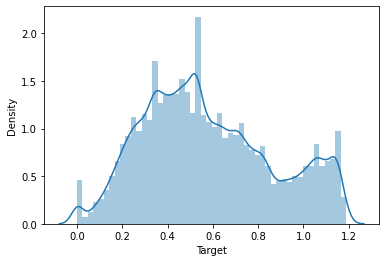

In [19]:
sns.distplot(df_v1['Target'])

<AxesSubplot:xlabel='Target'>

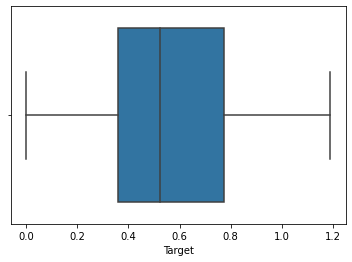

In [20]:
sns.boxplot(x='Target', data=df_v1)

In [21]:
df_v1.columns

Index(['State', 'District', 'Lat', 'Long', 'GW_depth_Min', 'GW_depth_Max',
       'Wells_depth_0_to_2', 'Wells_depth_2_to_5', 'Wells_depth_5_to_10',
       'Wells_depth_10_to_20', 'Wells_depth_20_to_40',
       'Wells_depth_40_and_above', 'Precipitation', 'Solar_Radiation',
       'Surface_Pressure', 'Humidity', 'Temp_Max', 'Temp_Min',
       'Dew_Frost_Point', 'Wind_Speed', 'Year', 'Season', 'Crop', 'Area',
       'Production', 'Yield', 'Target'],
      dtype='object')

## Drop Area and Production

In [22]:
df_v1 = df_v1.drop(['Area', 'Production'], axis=1)

In [23]:
df_v2 = df_v1.copy()

## State

<AxesSubplot:xlabel='Target', ylabel='State'>

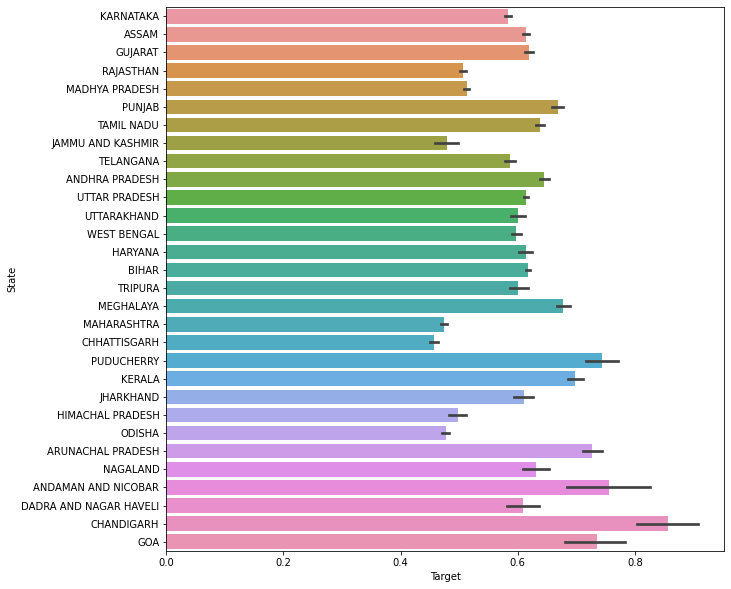

In [24]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Target', y='State', data=df_v2, orient='h')

## Lat-Long (Geo_Region)

In [25]:
with open('./latlong_custerer_6.pkl', 'rb') as f:
    latlong_clusterer = pickle.load(f)

df_v2 = identify_geo_region(df_v2, latlong_clusterer)

In [26]:
np.sort(df_v2['Geo_Region'].unique())

array(['R0', 'R1', 'R2', 'R3', 'R4', 'R5'], dtype=object)

<AxesSubplot:xlabel='Geo_Region', ylabel='Target'>

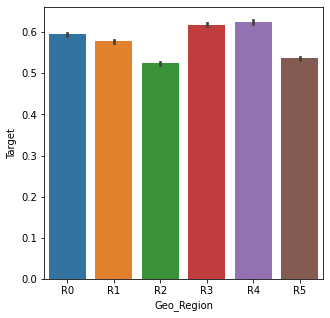

In [27]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Geo_Region', y='Target', data=df_v2, orient='v', order=np.sort(df_v2['Geo_Region'].unique()))

## Drop columns Lat, Long, State, District, Year

In [28]:
df_v2 = df_v2.drop(['Lat', 'Long', 'State', 'District', 'Year'], axis=1)

## Crop

In [34]:
df_v2['Crop'].nunique()

86

<AxesSubplot:xlabel='Target', ylabel='Crop'>

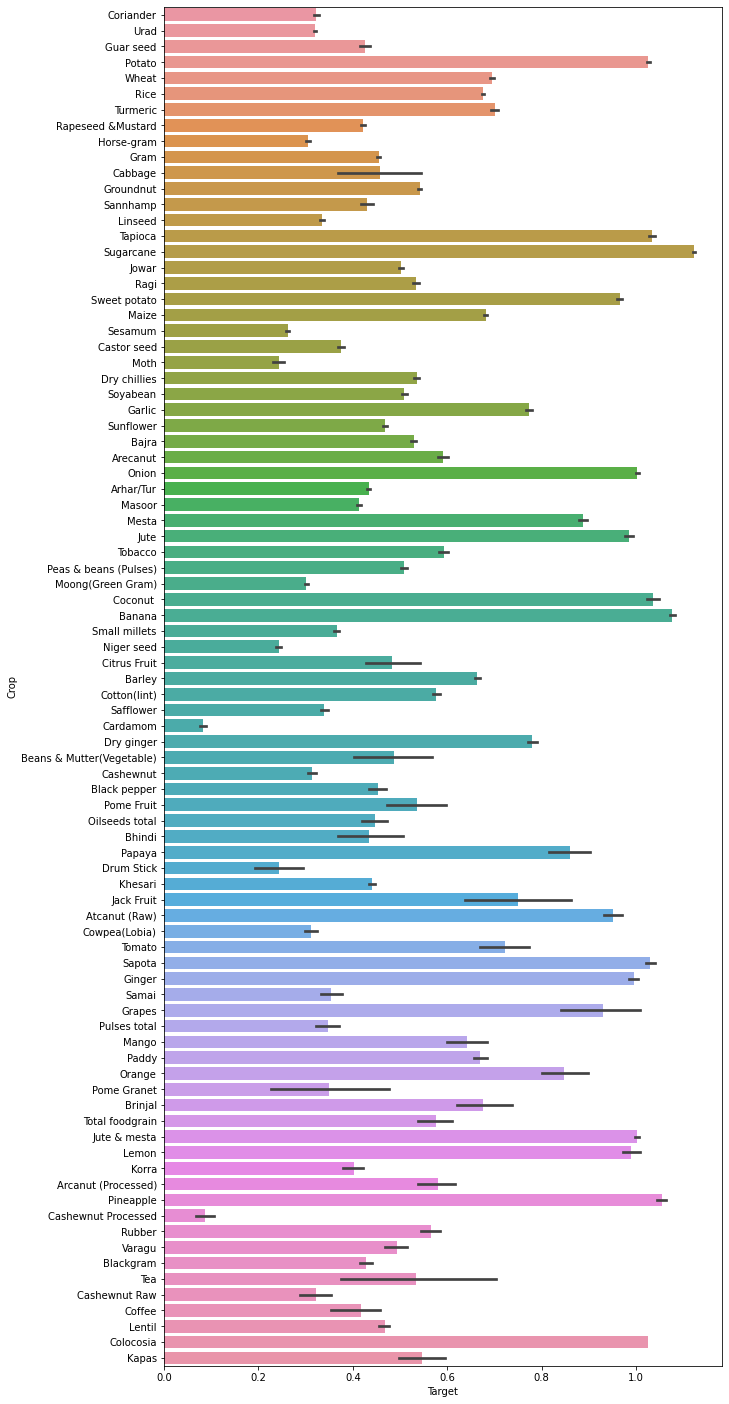

In [29]:
plt.figure(figsize=(10, 25))
sns.barplot(x='Target', y='Crop', data=df_v2, orient='h')

In [30]:
numerical_columns = df_v2.select_dtypes(exclude='object').columns
categorical_columns = df_v2.select_dtypes('object').columns

In [31]:
numerical_columns

Index(['GW_depth_Min', 'GW_depth_Max', 'Wells_depth_0_to_2',
       'Wells_depth_2_to_5', 'Wells_depth_5_to_10', 'Wells_depth_10_to_20',
       'Wells_depth_20_to_40', 'Wells_depth_40_and_above', 'Precipitation',
       'Solar_Radiation', 'Surface_Pressure', 'Humidity', 'Temp_Max',
       'Temp_Min', 'Dew_Frost_Point', 'Wind_Speed', 'Yield', 'Target'],
      dtype='object')

In [32]:
categorical_columns

Index(['Season', 'Crop', 'Geo_Region'], dtype='object')

## Season

<AxesSubplot:xlabel='Season', ylabel='Target'>

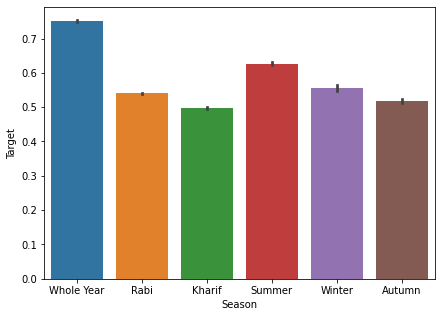

In [33]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Season', y='Target', data=df_v2, orient='v')